### Data cleaning and visiualisation

In [1]:
from __future__ import print_function, division

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import datetime

#### Exercise 1.1

- Open up a new IPython notebook
- Download a few MTA turnstile data files
- Read them into a pandas dataframe (pd.read_csv()), format the columns nicely, and display the first few rows.

Read the data into six separate dataframes and concatenate the data into one dataframe.

In [4]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [200606, 200530, 200411, 200321, 200208, 200118]
turnstiles_df = get_data(week_nums)

In [5]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553


In [6]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [7]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [8]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [9]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553


Concatenate the data into one dataframe.

In [10]:
turnstiles_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
205616,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/17/2020,04:00:00,REGULAR,5554,420
205617,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/17/2020,08:00:00,REGULAR,5554,420
205618,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/17/2020,12:00:00,REGULAR,5554,420
205619,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/17/2020,16:00:00,REGULAR,5554,420
205620,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/17/2020,20:00:00,REGULAR,5554,420


#### Exercise 1.2

- Let's turn this into a time series. Create a new column that stores the date and time as a single pandas datetime object.

The DATE and TIME columns are object datatypes, which in Pandas is a string.

In [11]:
from datetime import datetime as dt

In [12]:
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [13]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505,2020-05-30 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505,2020-05-30 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514,2020-05-30 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531,2020-05-30 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553,2020-05-30 16:00:00


Before moving on to Challenge 3, we want to check for duplicate entries and remove them.

We can isolate specific turnstiles by creating boolean series masks, then using them to index into the dataframe: 

In [14]:
mask = ((turnstiles_df["C/A"] == "A002") &
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505,2020-05-30 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505,2020-05-30 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514,2020-05-30 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531,2020-05-30 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553,2020-05-30 16:00:00


In [15]:
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
187403,H001,R175,00-00-02,8 AV,2020-02-01 00:00:00,2
233112,J009,R378,00-00-01,MYRTLE AV,2020-05-27 05:00:00,2
828378,R141,R031,00-03-01,34 ST-PENN STA,2020-03-18 16:00:00,1
828384,R141,R031,00-03-01,34 ST-PENN STA,2020-03-19 16:00:00,1
828383,R141,R031,00-03-01,34 ST-PENN STA,2020-03-19 12:00:00,1


In [16]:
# On 2/01 and 5/27, we seem to have two entries for same time.  Let's take a look
mask = ((turnstiles_df["C/A"] == "J009") & 
(turnstiles_df["UNIT"] == "R378") & 
(turnstiles_df["SCP"] == "00-00-01") & 
(turnstiles_df["STATION"] == "MYRTLE AV") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2020, 5, 27).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
40877,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,01:00:00,REGULAR,3047244,2109618,2020-05-27 01:00:00
40878,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,05:00:00,REGULAR,3047247,2109623,2020-05-27 05:00:00
40879,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,05:00:00,RECOVR AUD,3047246,2109623,2020-05-27 05:00:00
40880,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,09:00:00,REGULAR,3047363,2109697,2020-05-27 09:00:00
40881,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,13:00:00,REGULAR,3047424,2109765,2020-05-27 13:00:00


* Looks to be a incorrect AUD entry.  May be we should just select the Regular One.

In [17]:
turnstiles_df.DESC.value_counts()

REGULAR       1237883
RECOVR AUD       4690
Name: DESC, dtype: int64

* Since we are only interested in Entries, we might be OK.

In [18]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [19]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2020-01-11 03:00:00,1
828387,R141,R031,00-03-01,34 ST-PENN STA,2020-03-20 04:00:00,1
828385,R141,R031,00-03-01,34 ST-PENN STA,2020-03-19 20:00:00,1
828384,R141,R031,00-03-01,34 ST-PENN STA,2020-03-19 16:00:00,1
828383,R141,R031,00-03-01,34 ST-PENN STA,2020-03-19 12:00:00,1


* No more duplicate Entries

In [20]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

#### Exercise 1.3

- These counts are for every n hours (What is n?). Also, there's something odd about these "counts", what is it? Do they actually represent total entries for a time period, or something else? We want total daily entries, create a new dataframe with one row per turnstile/day and a column that gives total daily entries.

In [21]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [22]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,01/11/2020,7340476
1,A002,R051,02-00-00,59 ST,01/12/2020,7341214
2,A002,R051,02-00-00,59 ST,01/13/2020,7342558
3,A002,R051,02-00-00,59 ST,01/14/2020,7343865
4,A002,R051,02-00-00,59 ST,01/15/2020,7345249


In [23]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES"]]
                                                       .apply(lambda grp: grp.shift(1)))

In [24]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,01/11/2020,7340476,NaN,NaN
1,A002,R051,02-00-00,59 ST,01/12/2020,7341214,01/11/2020,7340476.0
2,A002,R051,02-00-00,59 ST,01/13/2020,7342558,01/12/2020,7341214.0
3,A002,R051,02-00-00,59 ST,01/14/2020,7343865,01/13/2020,7342558.0
4,A002,R051,02-00-00,59 ST,01/15/2020,7345249,01/14/2020,7343865.0


Remove Nan rowv for prev_date and prev_entries

In [25]:
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

### Next, let's look at some more weirdness in the data and think about handling it before we finalize our daily count column

In [26]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
476,A002,R051,02-06-00,59 ST,03/14/2020,35096,02/07/2020,76716.0
686,A006,R079,00-00-04,5 AV/59 ST,05/23/2020,1258,04/10/2020,7896758.0
714,A006,R079,00-03-00,5 AV/59 ST,03/14/2020,2330,02/07/2020,9410826.0
1060,A007,R079,01-06-03,5 AV/59 ST,04/07/2020,4,04/06/2020,7832194.0
1625,A011,R080,01-03-00,57 ST-7 AV,01/12/2020,885732015,01/11/2020,885732453.0


In [27]:
# Let's see how many stations have counter in reverse

(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION        
A002   R051  02-06-00  59 ST               1
A006   R079  00-00-04  5 AV/59 ST          1
             00-03-00  5 AV/59 ST          1
A007   R079  01-06-03  5 AV/59 ST          1
A011   R080  01-03-00  57 ST-7 AV         41
                                          ..
R629   R065  00-03-00  ROCKAWAY AV         1
R639   R109  00-05-02  CHURCH AV           1
R729   R292  00-00-01  BAYCHESTER AV       1
R730   R431  00-00-04  EASTCHSTER/DYRE    41
TRAM1  R468  00-00-01  RIT-MANHATTAN       1
Length: 288, dtype: int64

In [28]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

In [29]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,01/12/2020,7341214,01/11/2020,7340476.0,738.0
2,A002,R051,02-00-00,59 ST,01/13/2020,7342558,01/12/2020,7341214.0,1344.0
3,A002,R051,02-00-00,59 ST,01/14/2020,7343865,01/13/2020,7342558.0,1307.0
4,A002,R051,02-00-00,59 ST,01/15/2020,7345249,01/14/2020,7343865.0,1384.0
5,A002,R051,02-00-00,59 ST,01/16/2020,7346629,01/15/2020,7345249.0,1380.0


## Then we decided to improve data cleaning because we were still founding too big value of daily entries

We sorted the list of daily entries and took median of it. Then we were comparing daily entries to median. And if daily entries were 20 times bigger than median we were giving them value of median

In [30]:
def clean_daily_entries(row, median):

#Change entries that bigger than median * 20 to median
    counter = row['DAILY_ENTRIES']
    if counter > median*20:
        return median
    
    return counter

In [31]:
median = turnstiles_daily.sort_values("DAILY_ENTRIES", ascending=False)[['DAILY_ENTRIES']].median()['DAILY_ENTRIES']
median

181.0

In [32]:
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(clean_daily_entries, axis=1, median=median)

In [33]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,01/12/2020,7341214,01/11/2020,7340476.0,738.0
2,A002,R051,02-00-00,59 ST,01/13/2020,7342558,01/12/2020,7341214.0,1344.0
3,A002,R051,02-00-00,59 ST,01/14/2020,7343865,01/13/2020,7342558.0,1307.0
4,A002,R051,02-00-00,59 ST,01/15/2020,7345249,01/14/2020,7343865.0,1384.0
5,A002,R051,02-00-00,59 ST,01/16/2020,7346629,01/15/2020,7345249.0,1380.0


### Distribution of daily entries by station, for top 10 stations by volume

### Challenge 6


Similarly, combine everything in each station, and come up with daily time series for each STATION, by adding up all the turnstiles in a station.

In [34]:
# first get daily entries by station
stations_daily = \
(turnstiles_daily.groupby(['STATION','DATE'])['DAILY_ENTRIES'].sum()
                 .reset_index())

stations_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,01/12/2020,6048.0
1,1 AV,01/13/2020,12700.0
2,1 AV,01/14/2020,9445.0
3,1 AV,01/15/2020,10032.0
4,1 AV,01/16/2020,9836.0


In [35]:
# get top 10 stations by daily volume 
# (sum across all days is a reasonable way to define this)
top10_stations = \
    (stations_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .STATION.head(10))

top10_stations

61      34 ST-PENN STA
46               23 ST
226          FULTON ST
233    GRD CNTRL-42 ST
110              86 ST
353     TIMES SQ-42 ST
9               125 ST
68     42 ST-PORT AUTH
59     34 ST-HERALD SQ
14      14 ST-UNION SQ
Name: STATION, dtype: object

In [36]:
# next create a new df that filters the stations daily data down
# to the top 10 stations
top10_station_DF = \
    (stations_daily[stations_daily['STATION']
                    .isin(top10_stations)]
     .groupby(['STATION'])[['STATION', 'DAILY_ENTRIES']]
     .sum()
     .reset_index())

top10_station_DF.sort_values("DAILY_ENTRIES", ascending=False)

,STATION,DAILY_ENTRIES
4,34 ST-PENN STA,2208046.0
2,23 ST,1686532.0
7,FULTON ST,1481697.0
8,GRD CNTRL-42 ST,1294005.0
6,86 ST,1276193.0
9,TIMES SQ-42 ST,1209827.0
0,125 ST,1188790.0
5,42 ST-PORT AUTH,1164464.0
3,34 ST-HERALD SQ,1147997.0
1,14 ST-UNION SQ,1035080.0


### Challenge 7


Plot the daily time series for a station (34 ST-PENN STA)

For specific station

We can isolate specific station by creating boolean mask, then using them to index into the dataframe:

In [37]:
mask_station = (stations_daily["STATION"] == "34 ST-PENN STA")

In [38]:
specific_station_daily = stations_daily[mask_station]

In [39]:
specific_station_daily.head()

,STATION,DATE,DAILY_ENTRIES
2501,34 ST-PENN STA,01/12/2020,69083.0
2502,34 ST-PENN STA,01/13/2020,133823.0
2503,34 ST-PENN STA,01/14/2020,147805.0
2504,34 ST-PENN STA,01/15/2020,147340.0
2505,34 ST-PENN STA,01/16/2020,142678.0


Plotting daily time series for station 34 ST-PENN STA

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

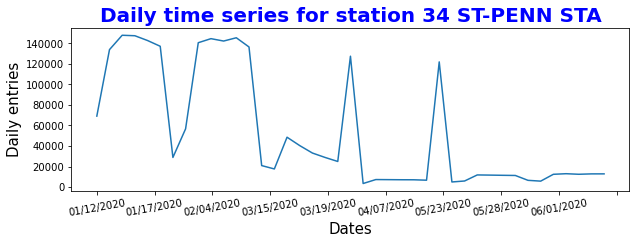

In [41]:
plt.figure(figsize=(10,3))

plt.plot(specific_station_daily.DATE, specific_station_daily['DAILY_ENTRIES'])
#plt.grid()
ticks_x = np.linspace(0, specific_station_daily.shape[0], 10)
plt.xticks(ticks_x, rotation=10)

plt.title('Daily time series for station 34 ST-PENN STA',fontsize = 20, weight='bold',color='b')
plt.ylabel('Daily entries', fontsize = 15, color='black');
plt.xlabel('Dates', fontsize = 15, color='black');


### Challenge 8

Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week. (hint: pandas datetime day of week may be useful)
plt.plot(week_count_list) for every week_count_list you created this way. You should get a rainbow plot of weekly commute numbers on top of each other

In [42]:
specific_station_daily.head()

,STATION,DATE,DAILY_ENTRIES
2501,34 ST-PENN STA,01/12/2020,69083.0
2502,34 ST-PENN STA,01/13/2020,133823.0
2503,34 ST-PENN STA,01/14/2020,147805.0
2504,34 ST-PENN STA,01/15/2020,147340.0
2505,34 ST-PENN STA,01/16/2020,142678.0


Adding a column DAY_OF_WEEK which has information whats the day of week is it

In [43]:
change_dates_form = pd.to_datetime(specific_station_daily['DATE'])

In [44]:
specific_station_daily['DAY_OF_WEEK']=change_dates_form.dt.dayofweek
specific_station_daily

<ipython-input-44-e845aaa7c3a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_station_daily['DAY_OF_WEEK']=change_dates_form.dt.dayofweek


,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK
2501,34 ST-PENN STA,01/12/2020,69083.0,6
2502,34 ST-PENN STA,01/13/2020,133823.0,0
2503,34 ST-PENN STA,01/14/2020,147805.0,1
2504,34 ST-PENN STA,01/15/2020,147340.0,2
2505,34 ST-PENN STA,01/16/2020,142678.0,3
2506,34 ST-PENN STA,01/17/2020,137078.0,4
2507,34 ST-PENN STA,02/01/2020,28837.0,5
2508,34 ST-PENN STA,02/02/2020,56682.0,6
2509,34 ST-PENN STA,02/03/2020,140549.0,0
2510,34 ST-PENN STA,02/04/2020,144491.0,1


Creating list of lists.


Checking missing days.

If we have missing data about one day during one week(ex: we have all info about Monday-Saturday, but don't have information about Sunday) we are not gonna use this week foir graphic

In [45]:
def split_weeks(list_of_weeks, entries):
    
    checked_entries, help_enrties = [], []
    
    for i in range(0, len(list_of_weeks), 1):
        if list_of_weeks[i]==0: #split by 0 value
            if len(help_enrties)==7: #adding only weeks that have data about all day in a row
                checked_entries.append(help_enrties)
            help_enrties=[]
        help_enrties.append(entries[i])
        
    return checked_entries

In [46]:
week_list = split_weeks(list(specific_station_daily['DAY_OF_WEEK']), list(specific_station_daily['DAILY_ENTRIES']))

Plotting of weekly commute numbers

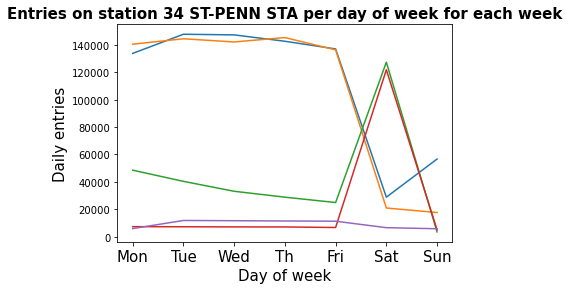

In [47]:
for i in week_list:
    plt.plot(i)

plt.ylabel('Daily entries', fontsize = 15, color='black')
plt.xlabel('Day of week', fontsize = 15, color='black');
plt.title('Entries on station 34 ST-PENN STA per day of week for each week',fontsize = 15, weight='bold',color='black')

ticks_x = np.linspace(0, 6, 7)
weeks=['Mon', 'Tue', 'Wed', 'Th', 'Fri', 'Sat', 'Sun']
plt.xticks(ticks_x, weeks, fontsize = '15',color='black')
plt.savefig("app2.svg");

#### Plotting entries for each day of week

In [48]:
station_day_of_week = specific_station_daily.groupby(['DAY_OF_WEEK'])['DAILY_ENTRIES'].sum()
station_day_of_week

DAY_OF_WEEK
0    348595.0
1    364748.0
2    353906.0
3    348282.0
4    329265.0
5    305611.0
6    157639.0
Name: DAILY_ENTRIES, dtype: float64

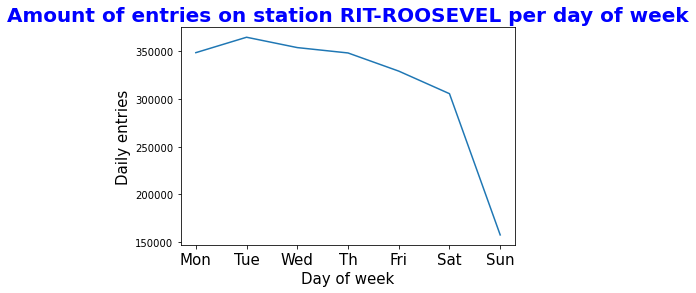

In [49]:
f1 = plt.plot(station_day_of_week)
#plt.grid()
plt.title('Amount of entries on station RIT-ROOSEVEL per day of week',fontsize = 20, weight='bold',color='b')
plt.ylabel('Daily entries', fontsize = 15, color='black')
plt.xlabel('Day of week', fontsize = 15, color='black')

ticks_x = np.linspace(0, 6, 7)
weeks=['Mon', 'Tue', 'Wed', 'Th', 'Fri', 'Sat', 'Sun']
plt.xticks(ticks_x, weeks, fontsize = '15',color='black');



# Show percentage of ridership that top 10 stations make up

Finding percentage of riders for each station (comparing to each other)

In [50]:
top10_station_DF['%_TO_EO']= top10_station_DF['DAILY_ENTRIES']/top10_station_DF.DAILY_ENTRIES.sum() * 100
top10_station_DF

,STATION,DAILY_ENTRIES,%_TO_EO
0,125 ST,1188790.0,8.681969
1,14 ST-UNION SQ,1035080.0,7.559395
2,23 ST,1686532.0,12.317078
3,34 ST-HERALD SQ,1147997.0,8.384050
4,34 ST-PENN STA,2208046.0,16.125798
5,42 ST-PORT AUTH,1164464.0,8.504312
6,86 ST,1276193.0,9.320291
7,FULTON ST,1481697.0,10.821127
8,GRD CNTRL-42 ST,1294005.0,9.450375
9,TIMES SQ-42 ST,1209827.0,8.835607


In [51]:
top10_station_DF['DAILY_ENTRIES'].describe()

count    1.000000e+01
mean     1.369263e+06
std      3.482900e+05
min      1.035080e+06
25%      1.170546e+06
50%      1.243010e+06
75%      1.434774e+06
max      2.208046e+06
Name: DAILY_ENTRIES, dtype: float64

In [52]:
top10_station_DF['%_TO_EO'].describe()

count    10.000000
mean     10.000000
std       2.543631
min       7.559395
25%       8.548726
50%       9.077949
75%      10.478439
max      16.125798
Name: %_TO_EO, dtype: float64



Plotting percentage of ridership that top 10 stations make up (comparing to each other)

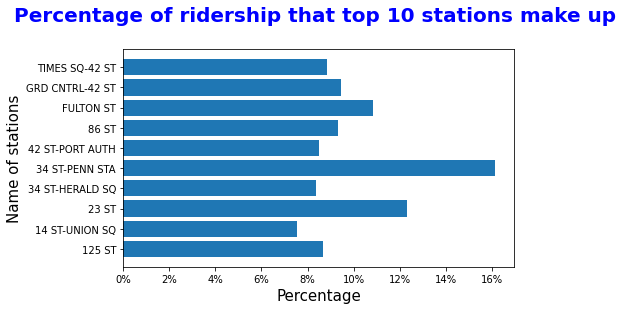

In [53]:
import matplotlib.ticker as mtick

data = top10_station_DF['STATION']
perc = top10_station_DF['%_TO_EO']

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

ax.barh(data, perc)

fmt = '%.0f%%' 
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)

plt.title('Percentage of ridership that top 10 stations make up \n',fontsize = 20, weight='bold',color='b')
plt.ylabel('Name of stations', fontsize = 15, color='black');
plt.xlabel('Percentage', fontsize = 15, color='black');

plt.show();

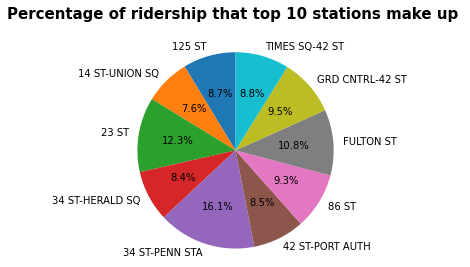

In [54]:
labels = top10_station_DF['STATION']
sizes = top10_station_DF['%_TO_EO']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of ridership that top 10 stations make up \n',fontsize = 15, weight='bold',color='black')
plt.show();

## Comparing 10 top station to others stations

Finding percentage of riders for each station comparing to all stations

In [55]:
top10_station_DF['%_TO_ALL']= top10_station_DF['DAILY_ENTRIES']/turnstiles_daily.DAILY_ENTRIES.sum() * 100
top10_station_DF

,STATION,DAILY_ENTRIES,%_TO_EO,%_TO_ALL
0,125 ST,1188790.0,8.681969,1.330423
1,14 ST-UNION SQ,1035080.0,7.559395,1.158400
2,23 ST,1686532.0,12.317078,1.887466
3,34 ST-HERALD SQ,1147997.0,8.384050,1.284770
4,34 ST-PENN STA,2208046.0,16.125798,2.471114
5,42 ST-PORT AUTH,1164464.0,8.504312,1.303199
6,86 ST,1276193.0,9.320291,1.428239
7,FULTON ST,1481697.0,10.821127,1.658227
8,GRD CNTRL-42 ST,1294005.0,9.450375,1.448173
9,TIMES SQ-42 ST,1209827.0,8.835607,1.353966


In [56]:
percentage_all_station = 100 - top10_station_DF['%_TO_ALL'].sum() #percentage other stations
percentage_all_station

84.67602162953958

In [57]:
count_stations = len(stations_daily.groupby('STATION')) #how many stations total
count_stations

379

Plotting percentage of ridership that top 10 stations make comparing to all stations 

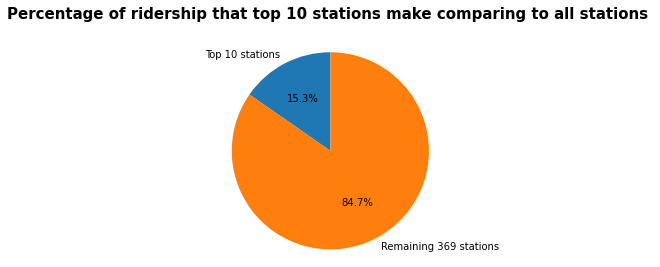

In [58]:
labels = ['Top 10 stations', 'Remaining {} stations'.format(count_stations-10)]
sizes = [top10_station_DF['%_TO_ALL'].sum(), percentage_all_station]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of ridership that top 10 stations make comparing to all stations \n',fontsize = 15, weight='bold',color='black')
plt.show();